# Day 2


In [4]:
import pandas as pd



In [5]:
data_path = '../Materials/data/'

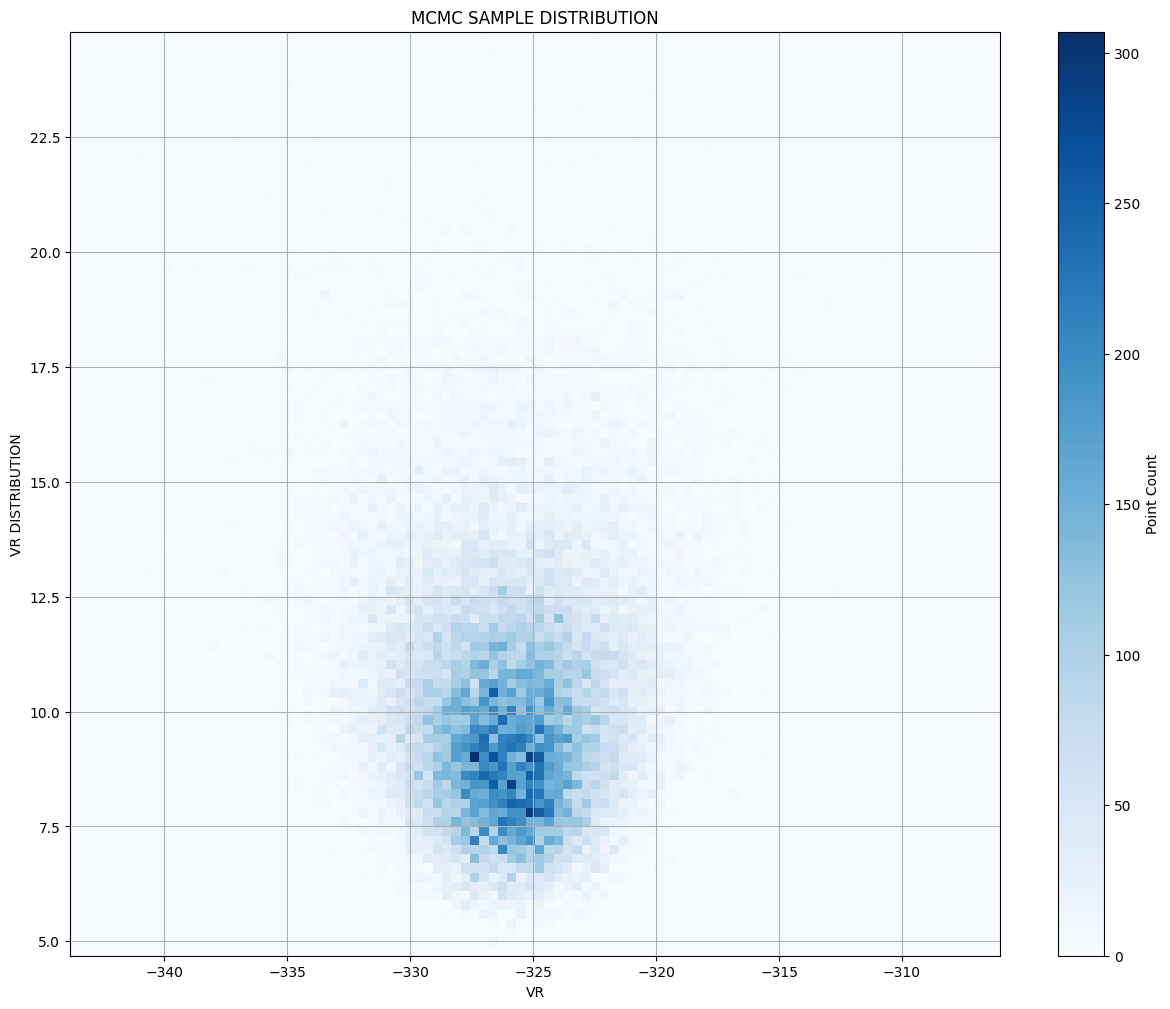

acceptance rate:  0.3716


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import pandas as pd

def likelihood(v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, vr, sigma):
    re = -6 * np.log(2 * np.pi) - 12 * np.log(sigma) - (
        (v1 - vr)**2 + (v2 - vr)**2 + (v3 - vr)**2 + (v4 - vr)**2 +
        (v5 - vr)**2 + (v6 - vr)**2 + (v7 - vr)**2 + (v8 - vr)**2 +
        (v9 - vr)**2 + (v10 - vr)**2 + (v11 - vr)**2 + (v12 - vr)**2
    ) / (2 * sigma**2)
    return re

vr=-330
sigma=10
vr_zero=vr
sigma_zero=sigma
s1=8
s2=1
a=0
vr_data=[]
sigma_data=[]
likelihood_data=[]
number_data=[]
vr_dia=[]
sigma_dia=[]
# test

v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12 = (
    -344.73, -323.98, -319.18, -327.82, -321.96, -313.30,
    -334.14, -333.23, -321.67, -314.25, -330.85, -326.63
)

plt.figure(figsize=(15, 12))

for i in range(100000):
    vr_temp=np.random.normal(loc=vr, scale=s1)
    sigma_temp=np.random.normal(loc=sigma, scale=s2)
    likelihood_value0=likelihood(v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, vr, sigma)
    likelihood_value1=likelihood(v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, vr_temp, sigma_temp)
    vr_data.append(vr)
    sigma_data.append(sigma)
    likelihood_data.append(likelihood_value0)
    number_data.append(a)
    if np.exp(likelihood_value1-likelihood_value0)>1:
        vr=vr_temp
        sigma=sigma_temp
        a=a+1
    else:
        num = random.uniform(0, 1)
        if np.exp(likelihood_value1-likelihood_value0)>num:
            vr=vr_temp
            sigma=sigma_temp
            a=a+1

plt.hist2d(vr_data, sigma_data, bins=100, cmap='Blues')

# 添加颜色条
plt.colorbar(label='Point Count')

# 设置标题和坐标轴
plt.title("MCMC SAMPLE DISTRIBUTION")
plt.xlabel("VR")
plt.ylabel("VR DISTRIBUTION")

plt.grid(True)
plt.show()

# 链导出部分
df = pd.DataFrame({
    '列1': number_data,
    '列2': vr_data,
    '列3': sigma_data,
    '列4': likelihood_data
})

# 导出为 CSV 文件
df.to_csv('output.csv', index=False, encoding='utf-8')
print("acceptance rate: ",a/100000)
